# 傅里叶变化
详细链接：https://zhuanlan.zhihu.com/p/19763358

## 傅里叶变换的作用
- 高频：变化剧烈的灰度分量，如边界
- 低频：变换缓慢的灰度分量，例如一片大海

## 滤波
- 低通滤波器：只保留低频，会使得图像模糊
- 高通滤波器：只保留高频，会使得图像细节得到增强

- OpenCV中主要就是cv2.dft()和cv2.idft()。输入图像需要先转化成np.float32格式。
- 得到的结果中频率为0的部分会在左上角，通常要转化到中心位置，可以通过shift变化来实现。
- cv2.dft()返回的结果是双通道的（实部，虚部），通常还需奥转化图像格式才能展示（0，255）

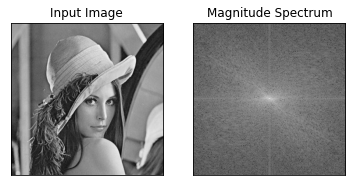

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./data/lena.jpg', 0)  # 以灰度图读取图片

img_float32 = np.float32(img)  # 转化为 float32 格式

dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# 得到灰度图能表示的形式
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

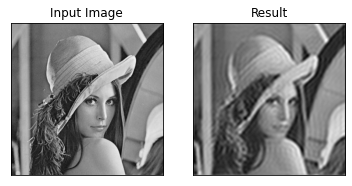

In [6]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)  # 中心位置

# 低通滤波
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()  

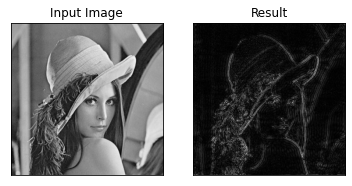

In [8]:
img = cv2.imread('./data/lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 高通滤波
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()    